In [79]:
# 多个maxdegree时,怎么去选？
#[sloved] Iteration 6,会返回所需要的点——寻找原则？找去除这个点后的子图度最大的点？
#[sloved] 一路上来的话 是不是找连通度最小的那个点
#[sloved] 入度为0的提前迭代？

In [80]:
import openpyxl
import copy
from openpyxl import Workbook
import json
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import time
import random

In [81]:
starttime  = time.time()

In [82]:
def get_dgenode(inputdict):
    if not inputdict:
        return None  # 或者根据需求返回其他值

    max_degree = max(inputdict.values())
    outputlist = [node for node, degree in inputdict.items() if degree == max_degree]

    if len(outputlist) == 1:
        return outputlist[0]
    else:
        return outputlist[random.randint(0, len(outputlist)-1)]

In [83]:
def remove_node_and_calculate_degrees(OD, node_to_remove):
    # 转换为 numpy 数组，以方便操作
    OD = np.array(OD)

    # 删除目标节点对应的行和列
    OD_removed = np.delete(OD, node_to_remove, axis=0)  # 删除行
    OD_removed = np.delete(OD_removed, node_to_remove, axis=1)  # 删除列

    # 计算剩余节点的度
    out_degrees = np.sum(OD_removed, axis=1)  # 计算出度
    in_degrees = np.sum(OD_removed, axis=0)  # 计算入度

    return out_degrees, in_degrees, OD_removed


In [84]:

def traceback(id,MyOD): 
    node_want_go = [id]  # 目标节点列表，初始包含 max_degree
    total_node_cango = []  # 用于存储最终能到目标的所有节点
    node_rec = []
    node_cut = {}
    new_node_rec = {}
    returnitem = {}
    flag = 0  # 记录迭代次数
    try:
        while node_want_go:  # 继续搜索直到没有新节点能到达
           
            #print(node_want_go)
            used_node = []
            new_nodes = []  # 当前轮次找到的新节点
            for item in node_want_go:
                
                if MyOD and item < len(MyOD[0]):  # 确保 MyOD 非空且索引合法
                    
                    qnode = []
                    for i in range(len(MyOD)):
                  
                        if MyOD[i][item] == 1 and i not in total_node_cango:
                            used_node.append(item)
                            new_nodes.append(i)  # 发现能到达目标的节点
                            qnode.append(i)
                            #print(qnode)
                            total_node_cango.append(i)  # 避免重复添加
                    if qnode:        
                        new_node_rec[item]=qnode
            
            
            if new_nodes != []:

                unused_nodes = [node for node in node_want_go if node not in used_node]
                node_cut[item] = unused_nodes

                node_rec.append(new_nodes)
            node_want_go = new_nodes  # 更新下一轮要探索的节点
            
            flag += 1
        for item in node_rec[-1]:
            # 计算去除这个点后的子图度
            out_degrees, in_degrees, OD_removed = remove_node_and_calculate_degrees(MyOD,item) 
            #print(item,sum(out_degrees) )
            returnitem[item] = sum(out_degrees)
    except Exception as e:

        out_degrees, in_degrees, OD_removed = remove_node_and_calculate_degrees(MyOD,id)
        returnitem[id] = sum(out_degrees)
    return returnitem


In [85]:
# 分个枝先
# if node_degree do not coop. to max_node_degree
# node.drop()
# 某个节点度明显小于 其他节点度  分支
def node_edge(id,MyOD): 
    node_want_go = [id]  # 目标节点列表，初始包含 max_degree
    total_node_cango = []  # 用于存储最终能到目标的所有节点
    node_rec = []
    node_cut = {}
    new_node_rec = {}
    returnitem = {}
    flag = 0  # 记录迭代次数
    try:
        while node_want_go:  # 继续搜索直到没有新节点能到达
            print(f"    -GO_BACK--Iteration {flag + 1} --------------------------------------------")
            #print(node_want_go)
            used_node = []
            new_nodes = []  # 当前轮次找到的新节点
            for item in node_want_go:
                
                if MyOD and item < len(MyOD[0]):  # 确保 MyOD 非空且索引合法
                    
                    qnode = []
                    for i in range(len(MyOD)):
                        #print(f'node {item} status is {MyOD[i][item]} and {MyOD[i][item] == 1 and i not in total_node_cango}')
                        #if MyOD[i][item] == 1 and i not in total_node_cango:
                        if MyOD[i][item] == 1 and i not in total_node_cango:
                            used_node.append(item)
                            #print(f'node {item} status is {MyOD[i][item]} and {MyOD[i][item] == 1 and i not in total_node_cango}')
                            new_nodes.append(i)  # 发现能到达目标的节点
                            qnode.append(i)
                            #print(qnode)
                            total_node_cango.append(i)  # 避免重复添加
                    if qnode:        
                        new_node_rec[item]=qnode
                        #print(f' node {item} -> {qnode}')
                else:
                    print("    Error: max_degree exceeds column bounds or MyOD is empty.")
            
            if new_nodes != []:
                #print(used_node,node_want_go)
                unused_nodes = [node for node in node_want_go if node not in used_node]
                node_cut[item] = unused_nodes

                if unused_nodes:
            
                    print(f'    node {unused_nodes} dont go')
                else:
                    print('    No Node will be not to go')
                node_rec.append(new_nodes)
            node_want_go = new_nodes  # 更新下一轮要探索的节点
            
            flag += 1
            print(f"    new_nodes: {new_nodes}")

        print("    Total nodes that can reach the target:", total_node_cango)
        print(f'    node_rec{node_rec}')
        for item in node_rec[-1]:
            # 计算去除这个点后的子图度
            out_degrees, in_degrees, OD_removed = remove_node_and_calculate_degrees(MyOD,item) 
            #print(item,sum(out_degrees) )
            returnitem[item] = sum(out_degrees)
    except Exception as e:
        print(f'    Go_back Raise Error: {e}')
        print(f'    Possible No Point Can Go to This Point {id}')
        out_degrees, in_degrees, OD_removed = remove_node_and_calculate_degrees(MyOD,id)
        returnitem[id] = sum(out_degrees)
    return returnitem


In [86]:
with open('wanna_range.json','r') as f:
    wanna_range = json.load(f)

In [87]:
def get_values(filename,id = 0,delme = 0):
    wb = openpyxl.load_workbook(filename)
    sheet_names = wb.sheetnames
    print(sheet_names)

    sheet = wb[sheet_names[id]]
    maxrow = sheet.max_row 
    maxcol = sheet.max_column 
    value = sheet.cell(row=2, column=1).value
    alldata = []

    for row in sheet.iter_rows(min_row=1, max_row=maxrow, min_col=1, max_col=maxcol): # type: ignore
        row_data = [cell.value for cell in row]
        alldata.append(row_data)
    station_name = alldata[0][1:]

    if delme:
        del alldata[0]
        for i in range(len(alldata)):
            del alldata[i][0]
    return alldata,station_name

In [88]:
def refineme(data):
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] is None:
                data[i][j] = 0
    return data

In [89]:
def convme(data,title):
    degree = {}
    alldegree = 0
    for i,row in enumerate(data):
        
        degree[title[i]] = sum(row)
        alldegree = alldegree + sum(row)
    return degree,alldegree

In [90]:
def findme_maxdegreee(degree):
    max_degree = max(degree.values())

    max_degree_node = []
    for key in degree:
        if int(degree[key]) == int(max_degree):
            max_degree_node.append(key)
    return(max_degree,max_degree_node)

In [91]:
def picme(station_name, MyOD):
    plt.figure(figsize=(12, 8))  # 增加画布尺寸
    MyOD = np.array(MyOD)
    plt.imshow(MyOD, cmap='Blues', aspect='auto', interpolation='nearest')
    plt.colorbar(label='Value')

    # 设置步长以减少标签密度
    step = max(1, len(station_name) //20)  # 只显示20个标签
    plt.xticks(ticks=np.arange(len(station_name))[::step], labels=station_name[::step], rotation=45, fontsize=8)
    plt.yticks(ticks=np.arange(len(station_name))[::step], labels=station_name[::step], fontsize=8)

    plt.title('Graph Adjacency')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.tight_layout()
    plt.show()


In [92]:
def dfs(matrix, start):
    vis_his = []  # 访问历史记录
    visited = []  # 已访问节点列表
    stack = [start]  # 用栈实现深度优先搜索
    vis_his.append(start)

    while stack:
        #print(stack)
        node = stack.pop()  # 弹出栈顶节点
        if node not in visited:
            visited.append(node)  # 标记为已访问
            # 将与当前节点相连的未访问节点压入栈中
            for i in range(len(matrix[node]) - 1, -1, -1):  # 从后往前遍历，确保顺序一致
                if matrix[node][i] == 1 and i not in visited:
                    stack.append(i)
                    vis_his.append(i)
    print(vis_his)
    vis_his = list(set(vis_his))
    return visited, vis_his

def bfs(matrix, start):
    visited = []  # 已访问节点列表
    queue = [start]  # 待访问节点队列
    vis_his = [start]  # 访问历史记录，按顺序记录

    while queue:
        node = queue.pop(0)  # 弹出队列头部节点
        if node not in visited:
            visited.append(node)  # 标记为已访问
            # 将与当前节点相连的未访问节点加入队列
            for i in range(len(matrix[node])):
                if matrix[node][i] == 1 and i not in visited and i not in queue:
                    queue.append(i)
                    vis_his.append(i)  # 按顺序记录访问历史

    return visited, vis_his


In [93]:
def replace_ones(matrix, i):
    # 替换第i行的1为0
    matrix[i] = [0 if x == 1 else x for x in matrix[i]]
    
    # 替换第i列的1为0
    for row in matrix:
        if row[i] == 1:
            row[i] = 0

In [94]:
MyOD,station_name = get_values(f'random_gen@{wanna_range}.xlsx',delme=1)

['Sheet1']


In [95]:
station_index = {}
index_station = {}
for i , item in enumerate(station_name):
    station_index[item] = i
    index_station[i] = item

In [96]:
MyOD = refineme(MyOD)
i = 0

In [97]:
def dropme(MyOD,allready_vis):
    for item in allready_vis:
        # 遍历每一行
        MyOD[station_index[item]] = [0 if x == 1 else x for x in MyOD[station_index[item]]]
        for row in MyOD:
            if row[station_index[item]] == 1:
                row[station_index[item]] = 0
    return MyOD

In [98]:
degree = convme(MyOD,station_name)

In [99]:
startpoint = []

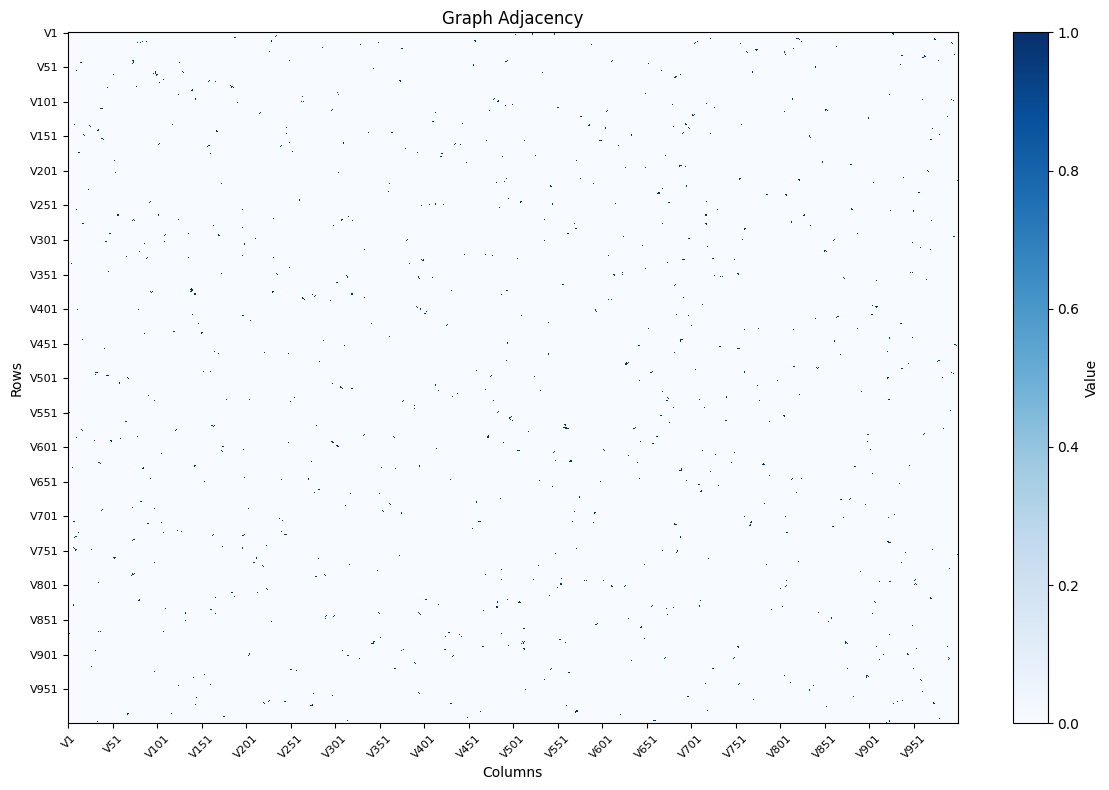

In [100]:
picme(station_name, MyOD)

In [101]:
'''max_degree = 499
total_node_cango = []

if MyOD and max_degree < len(MyOD[0]):  # 确保 MyOD 非空且 max_degree 不越界
    node_cango = []
    for i in range(len(MyOD)):
        if MyOD[i][max_degree] == 1:
            node_cango.append(i)
    
    total_node_cango.extend(node_cango)  # 如果需要将结果存储到 total_node_cango
else:
    print("Error: max_degree exceeds column bounds or MyOD is empty.")

# 打印结果
print("Nodes that can go:", node_cango)
'''

'max_degree = 499\ntotal_node_cango = []\n\nif MyOD and max_degree < len(MyOD[0]):  # 确保 MyOD 非空且 max_degree 不越界\n    node_cango = []\n    for i in range(len(MyOD)):\n        if MyOD[i][max_degree] == 1:\n            node_cango.append(i)\n    \n    total_node_cango.extend(node_cango)  # 如果需要将结果存储到 total_node_cango\nelse:\n    print("Error: max_degree exceeds column bounds or MyOD is empty.")\n\n# 打印结果\nprint("Nodes that can go:", node_cango)\n'

In [102]:
i = 0
visrec = []  # 初始化原始起点列表
old_startpoint = []  # 初始化原始起点列表
new_startpoint = []  # 初始化回溯起点列表 node_edge(原始起点列表)=回溯起点列表
again_visit = copy.deepcopy(station_name)  # 未访问的所有节点列表

while True:
    print(f'Turn {i+1}')

    degree, alldegree = convme(MyOD, station_name) # degree 是每个节点的度 alldegree 是所有点的度
    print(f'Total degree is {alldegree}')

    if alldegree: # 若图中还有联通边
        max_degree, max_degree_node = findme_maxdegreee(degree) 
        #找到最大的度 和其对应的点 点返回的是list
        print(max_degree_node)
        temp_p = {}
        #print(len(max_degree_node))
        if len(max_degree_node) > 1:
            #print("loopagain")
            for node in max_degree_node:
                temp_n = traceback(station_index[node], MyOD)
                #print(temp_n)
                max_key = max(temp_n, key=lambda k: temp_n[k])
                max_value = temp_n[max_key]
                temp_p[index_station[max_key]] = max_value
            #    print('maxkey ',index_station[max_key])
            m_key = max(temp_p, key=lambda k: temp_p[k])
        else:
            m_key = max_degree_node[0]
        print(f'maxkey is {index_station[max_key]}')
        # 目前返回的是 去除这点后图最大的
        
        #mychoice = np.random.randint(0, len(max_degree_node))
        #随机返回一个在mychoice的最大点索引
        '目前需要进行更正的地方'

        old_point = m_key
        #依据索引返回一个迭代点
        old_startpoint.append(old_point)
        #原始起点列表记录迭代情况

        print(f'The max degree is {max_degree} @ {old_point}')

        final_descision = node_edge(station_index[old_point], MyOD)
        #通过node_edge对原始点进行回溯 找到新起点 返回的是 这个点:去除这个点后的子图度 目的是使得选这个点影响最小
        '需要注意的是你没有考虑整体影响最小 你只在最后一个点选了最小的'
        
        print(final_descision)
        new_point = index_station[get_dgenode(final_descision)]
        #get_dgenode用于在图论或网络分析中快速定位最高连接节点，并在存在多个高连接节点时提供随机选择以增加算法的灵活性
        '总之又是随机返回一个点 如果有多个点的话'

        print(f'After correct choose {new_point}')
        new_startpoint.append(new_point)
        #回溯起点列表记录迭代情况

        visrec.append(new_point)

        bfs_order, allready_vis = bfs(MyOD, station_index[new_point])
        #做广度优先

        allready_vis = [index_station[item] for item in bfs_order]
        #记录已访问点的情况

        print(f'The turn {i+1} visited node is {allready_vis}')

        MyOD = dropme(MyOD, allready_vis)
        #去除已访问点 并返回新图的联通图度数

        again_visit = [item for item in again_visit if item not in allready_vis]
        #记录未访问点的情况

        print(f'Still node {again_visit} not visited')
        print(f'=============================================================')
    else:
        # 合并未访问节点到old_startpoint
        new_startpoint += again_visit
        # 按编号排序
        sorted_startpoint = sorted(new_startpoint, key=lambda x: int(x[1:]))
        print(f'Total node {sorted_startpoint} is the origin. \n  {len(sorted_startpoint)} nodes')
        print(f'+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-')
        break

    i += 1

Turn 1
Total degree is 2061
['V533']
maxkey is V815
The max degree is 11 @ V533
    -GO_BACK--Iteration 1 --------------------------------------------
    new_nodes: []
    Total nodes that can reach the target: []
    node_rec[]
    Go_back Raise Error: list index out of range
    Possible No Point Can Go to This Point 532
{532: 2050}
After correct choose V533
The turn 1 visited node is ['V533', 'V59', 'V204', 'V205', 'V206', 'V376', 'V672', 'V673', 'V674', 'V711', 'V776', 'V923', 'V99', 'V130', 'V534', 'V770', 'V54', 'V304', 'V93', 'V95', 'V138', 'V139', 'V230', 'V231', 'V378', 'V575', 'V107', 'V108', 'V689', 'V813', 'V814', 'V965', 'V251', 'V252', 'V543', 'V66', 'V479', 'V994', 'V410', 'V411', 'V98', 'V377', 'V777', 'V344', 'V43', 'V44', 'V109', 'V606', 'V246', 'V604', 'V605', 'V698', 'V361', 'V319', 'V320', 'V558', 'V559', 'V561', 'V562', 'V637', 'V492', 'V314', 'V73', 'V349', 'V398', 'V197', 'V715', 'V717', 'V682', 'V683', 'V628', 'V630', 'V450', 'V980', 'V904', 'V933', 'V78', 'V1

In [103]:
with open('start_nodes@ onedirection_V1.json','w') as f:
    json.dump(sorted_startpoint,f)

In [104]:
USED_time = time.time()
print(f'total time is {USED_time- starttime}')

total time is 21.617774963378906
